#### 1. Perform web scraping on the site mechalord7.github.io and retrieve article titles and summaries as displayed on Home page
#### 2. Read CSV file "Assignment1.csv" using Pandas. Display first 15 rows of the dataframe. Display the rows where column "Awards" is "1 win" and "5 wins". Identify max and min values in Height column and handle outliers by removing them, then identify rows where Height value is null and impute the missing values.
#### 3. Sort celebs by height in descending order. Calculate age based on Date of Birth and group rows by "Role" and calculate average Age.
#### 4. Create a histogram to visualize the distribution of celebrities' ages.
#### 5. Create a box plot to compare the ages of male and female celebrities.
#### 6. Create a bar chart to display the count of celebrities by their professions.
#### 7. Calculate the correlation matrix between ages, heights, and awards won by celebrities.
#### 8. Identify an apt visualization to plot the trend of celebrities ages over their ranking. Also name one bad visualization.

In [ ]:
# 1. Perform web scraping on the site mechalord7.github.io and retrieve article titles and summaries as displayed on Home page

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://mechalord7.github.io/"

response = requests.get(url)

if response.status_code==200:
    print("Request was successful\n")
else:
    print("Request Failed\n")

data = BeautifulSoup(response.text,"html.parser")

headings=[]
description=[]

for i in data.select(".list__item"):
    article_title=i.find("a").text
    article_summary = i.find_all("p")[1].text
    headings.append(article_title)
    description.append(article_summary)

for i, (headline, summary) in enumerate(zip(headings, description),start=1):
    print(f"{i}. {headline}\n{summary}\n")

Request was successful

1. Essentials? Not the tools!

How do you handle different terrain?


2. Motorycling Skills

Did you just think you couldn’t do that?


3. Ride to Bidadi

Need Therapy? - Nah, just ride!


4. A Hero Off the Road

The cool guy who excels at sports


5. The Urban Hunter

Playing field: Thick Urban Jungle


6. Scram away

A younger sibling for the young?


7. Tauro

First love.


8. Safety

Safety on the road. Your responsibilities and how they matter!


9. Dreams

What are dreams? and what are they to us?


10. Rambler Talez

Welcome to my blog! Now hear me ramble.




In [ ]:
# 2. Read CSV file "Assignment1.csv" using Pandas.
# Display first 15 rows of the dataframe. Display the rows where column "Awards" is "1 win" and "5 wins".
# Identify max and min values in Height column and handle outliers by removing them, then identify rows where Height value is null and impute the missing values.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Assignment1.csv"
data = pd.read_csv(file_path)


In [ ]:
print("The first fifteen rows are:")
print(data.head(15))

The first fifteen rows are:
    Rank               Name  Gender Date_of_birth  height in m  \
0      1      Anya Chalotra  Female    21-07-1995         1.68   
1      2      Hayley Atwell  Female    05-04-1982         1.69   
2      3   Rebecca Ferguson  Female    19-10-1983         1.65   
3      4      Vanessa Kirby  Female    18-04-1988         1.70   
4      5         Tom Cruise    Male    03-07-1962         1.70   
5      6        Freya Allan  Female    06-09-2001         1.65   
6      7    Pom Klementieff  Female    03-05-1986       128.00   
7      8       Ellen Barkin  Female    16-04-1954         1.68   
8      9      Florence Pugh  Female    03-01-1996         1.62   
9     10        Nina Dobrev  Female    09-01-1989         1.70   
10    11     Cillian Murphy    Male    25-05-1976         1.72   
11    12       Henry Cavill    Male    05-05-1983         1.85   
12    13      Margot Robbie  Female    02-07-1990         1.68   
13    14       Jim Caviezel    Male    26-09-196

In [ ]:
data[data['Awards'].isin(['1 win', '5 wins'])]

,Rank,Name,Gender,Date_of_birth,height in m,Role,Awards,Famous_for,Birth_place
0,1,Anya Chalotra,Female,21-07-1995,1.68,['Actress'],1 win,The Witcher,"Wolverhampton, Staffordshire, England, UK"
6,7,Pom Klementieff,Female,03-05-1986,128.00,"['Actress', 'Writer']",1 win,Guardians of the Galaxy Vol. 2,"Quebec City, Quebec, Canada"
13,14,Jim Caviezel,Male,26-09-1968,1.88,"['Actor', 'Producer']",5 wins,The Passion of the Christ,"Mount Vernon, Washington, USA"
18,19,Lana Parrilla,Female,15-07-1977,1.68,"['Actress', 'Director', 'Producer']",5 wins,Once Upon a Time,"Brooklyn, New York City, New York, USA"
22,23,Isabela Merced,Female,10-07-2001,1.55,"['Actress', 'Soundtrack', 'Music Department']",5 wins,Transformers: The Last Knight,"Cleveland, Ohio, USA"
28,29,Molly Gordon,Female,06-12-1994,1.63,"['Actress', 'Producer', 'Writer']",1 win,Booksmart,"Los Angeles, California, USA"
30,31,Gabriel Macht,Male,22-01-1972,1.83,"['Actor', 'Director', 'Producer']",1 win,The Good Shepherd,"The Bronx, New York City, New York, USA"
35,36,Poorna Jagannathan,Female,22-12-1972,1.69,['Actress'],1 win,The Night Of,"Tunis, Tunisia"
46,47,Golshifteh Farahani,Female,10-07-1983,1.69,"['Actress', 'Composer', 'Camera and Electrical...",5 wins,Paterson,"Tehran, Iran"
66,67,MyAnna Buring,Female,22-09-1979,1.57,"['Actress', 'Writer']",1 win,Kill List,"Sundsvall, Västernorrlands län, Sweden"


In [ ]:
height_max = data['height in m'].max()
height_min = data['height in m'].min()
print(height_max,"      ",height_min)

1000.0        0.02


In [ ]:
data['height in m'] = np.where((data['height in m'] > height_max) | (data['height in m'] < height_min), np.nan, data['height in m'])

In [ ]:
mean_height = data['height in m'].mean()
data['height in m'].fillna(mean_height, inplace=True)

In [ ]:
# 3. Sort celebs by height in descending order. Calculate age based on Date of Birth and group rows by "Role" and calculate average Age.

sorted_data = data.sort_values(by='height in m', ascending=False)


In [ ]:
data['Date_of_birth'] = pd.to_datetime(data['Date_of_birth'])
current_year = pd.to_datetime('today').year
data['Age'] = current_year - data['Date_of_birth'].dt.year
data['Age']


0     28
1     41
2     40
3     35
4     61
      ..
95    33
96    44
97    51
98    26
99    34
Name: Age, Length: 100, dtype: int64

In [ ]:
avg_age_by_role = data.groupby('Role')['Age'].mean()
avg_age_by_role

Role
['Actor', 'Additional Crew']                                   53.000000
['Actor', 'Director', 'Producer']                              50.090909
['Actor', 'Director', 'Writer']                                44.000000
['Actor', 'Producer', 'Additional Crew']                       40.000000
['Actor', 'Producer', 'Executive']                             65.000000
['Actor', 'Producer', 'Writer']                                50.800000
['Actor', 'Producer']                                          47.333333
['Actor', 'Soundtrack', 'Producer']                            41.000000
['Actor', 'Soundtrack']                                        45.000000
['Actor']                                                      37.000000
['Actress', 'Composer', 'Camera and Electrical Department']    40.000000
['Actress', 'Composer', 'Producer']                            27.000000
['Actress', 'Director', 'Producer']                            40.000000
['Actress', 'Director', 'Writer']             

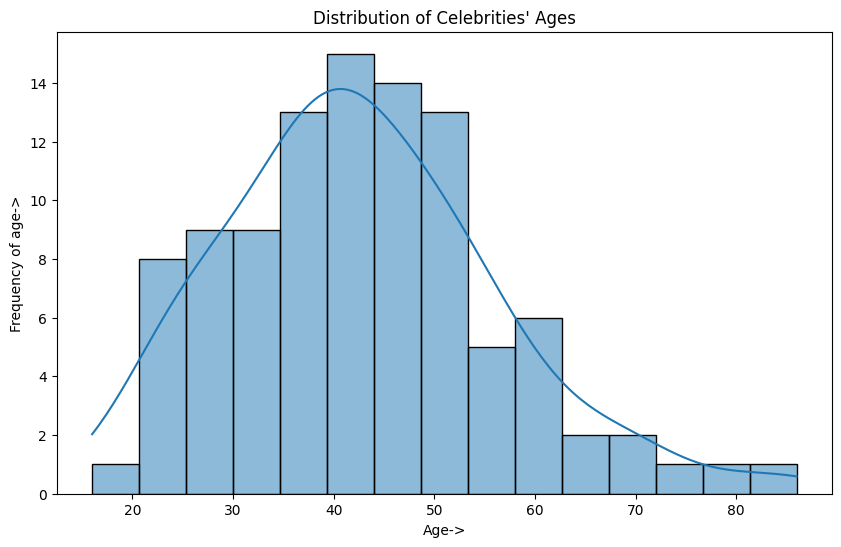

In [ ]:
#4 Create a histogram to visualize the distribution of celebrities' ages.

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True)

plt.xlabel('Age->')
plt.ylabel('Frequency of age->')

plt.title('Distribution of Celebrities\' Ages')
plt.show()

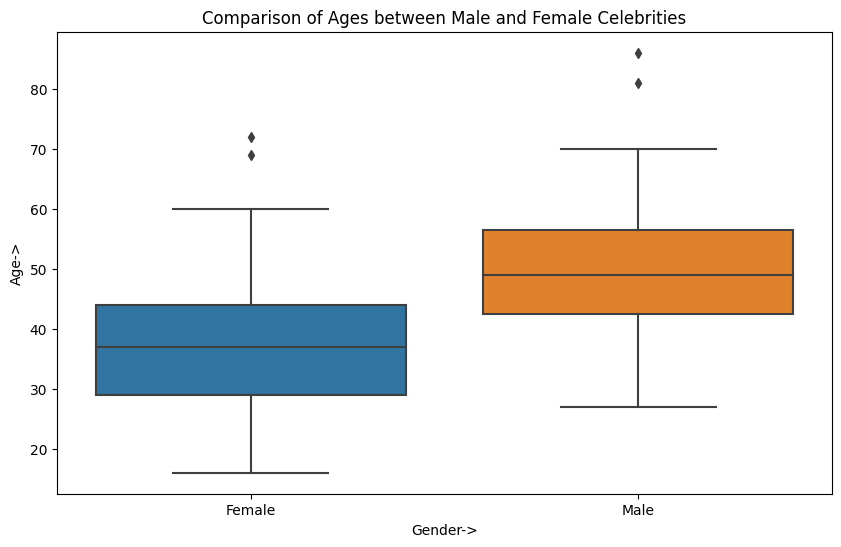

In [ ]:
#5 Create a box plot to compare the ages of male and female celebrities.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=data)

plt.xlabel('Gender->')
plt.ylabel('Age->')

plt.title('Comparison of Ages between Male and Female Celebrities')
plt.show()

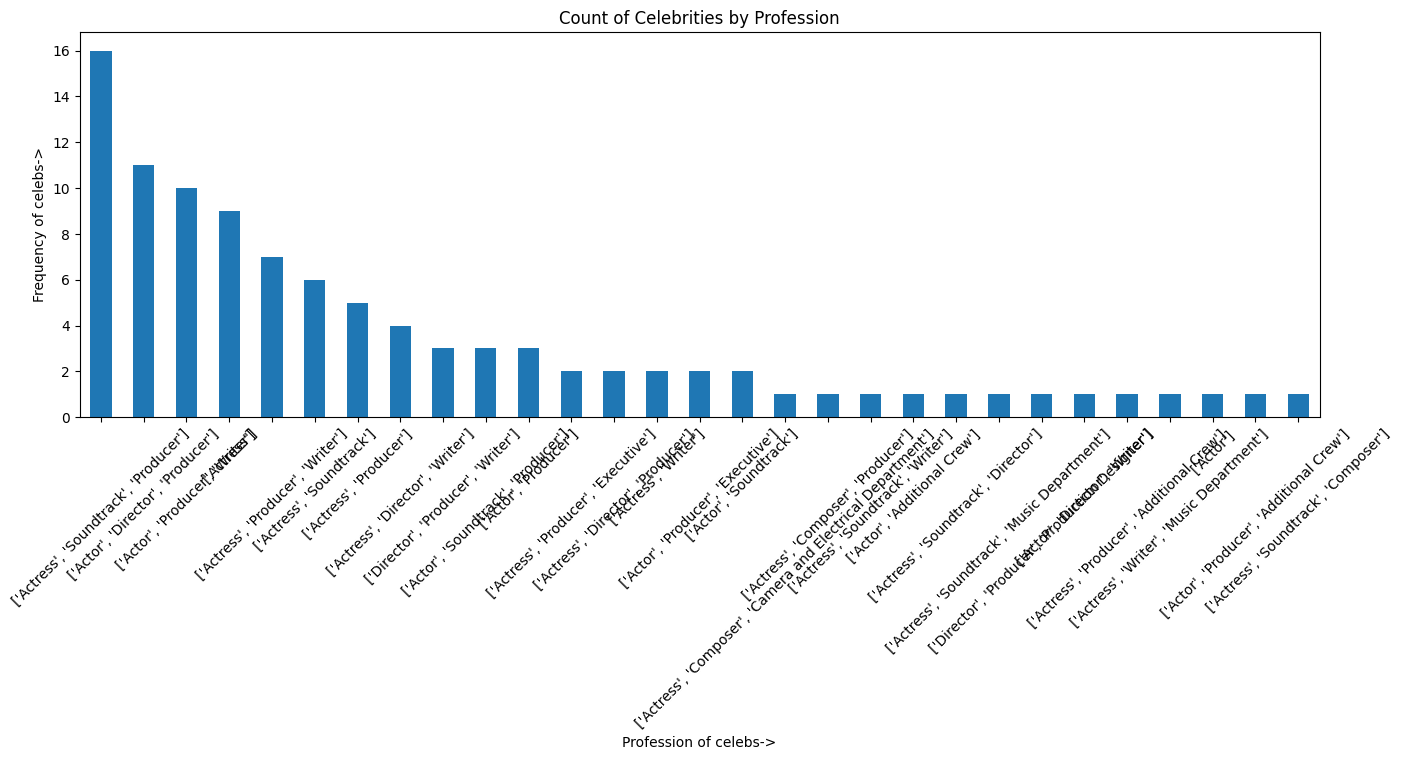

In [ ]:
#6 Create a bar chart to display the count of celebrities by their professions.

plt.figure(figsize=(16, 5))
data['Role'].value_counts().plot(kind='bar')

plt.xlabel('Profession of celebs->')
plt.ylabel('Frequency of celebs->')

plt.title('Count of Celebrities by Profession')
plt.xticks(rotation=45)
plt.show()

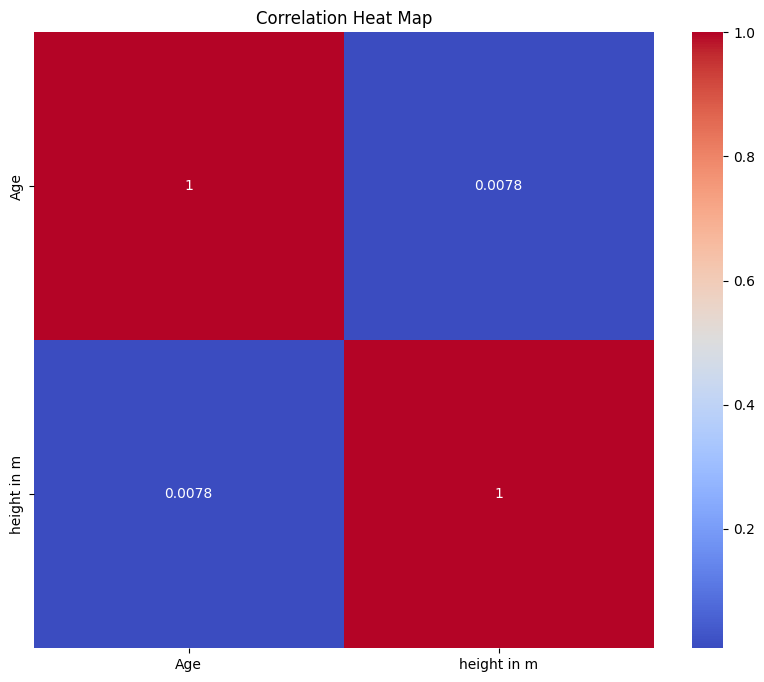

In [ ]:
#7. Calculate the correlation matrix between ages, heights, and awards won by celebrities.

correlation_matrix = data[['Age', 'height in m', 'Awards']].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map")
plt.show()

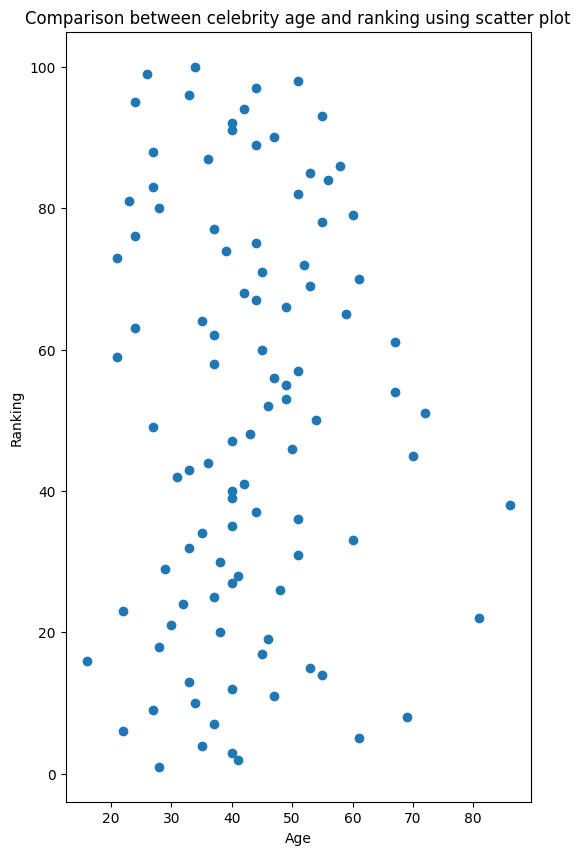

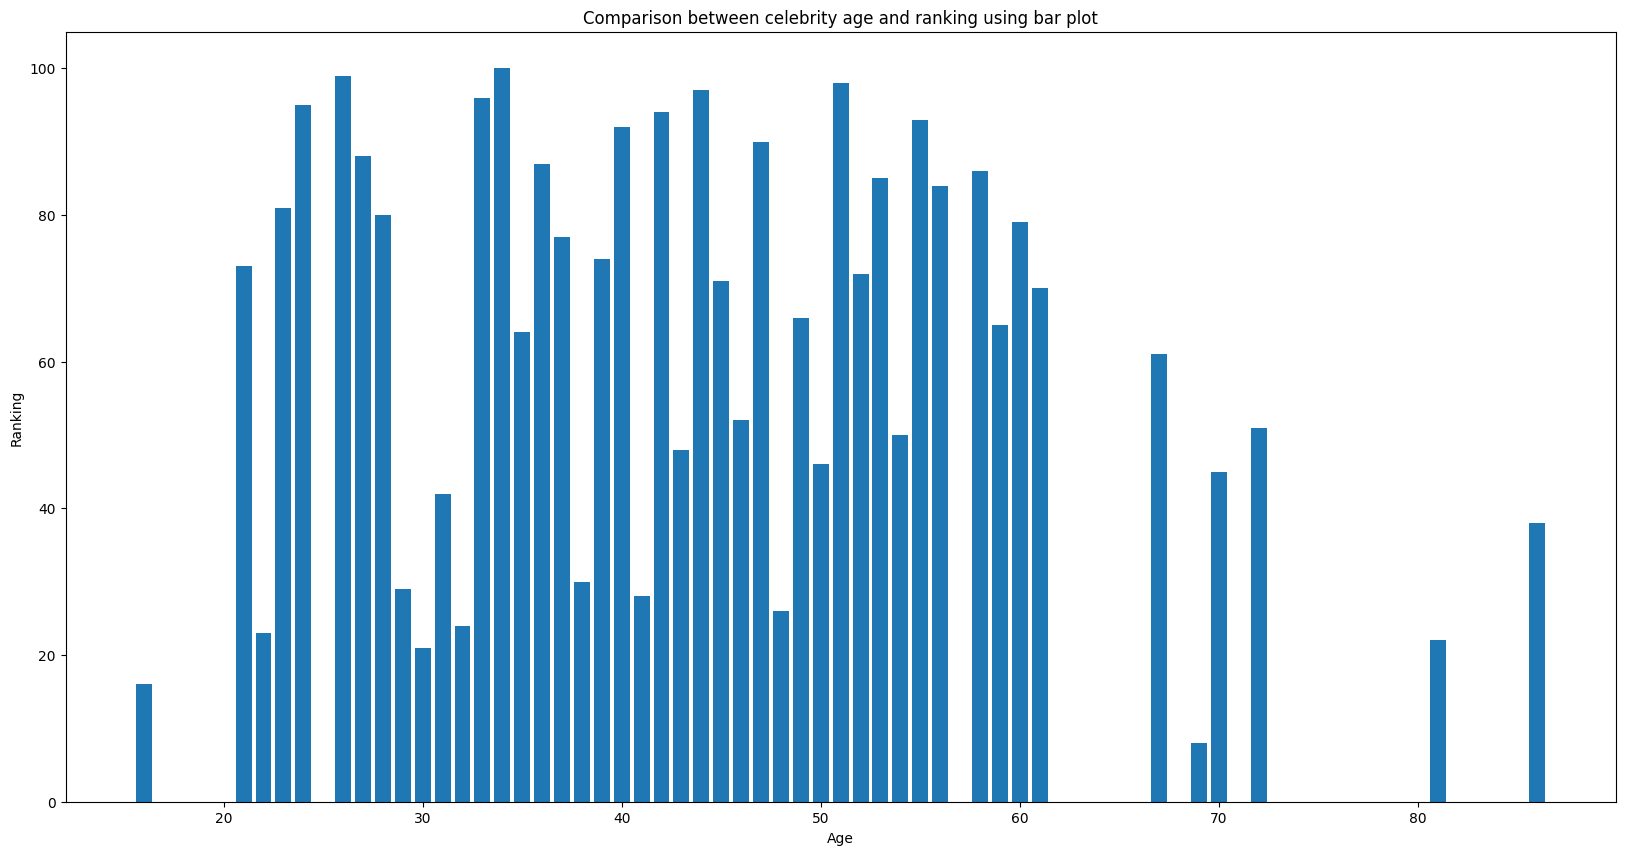

Scatter plot is a better visualisation method compared to bar plot.
This is because:
A scatter plot directly shows the relationship between variables through individual data points, enabling the observation of correlations and patterns.
In contrast, a bar plot is designed for categorical data and lacks the granularity needed to display correlation effectively.


In [ ]:
#8. Identify an apt visualization to plot the trend of celebrities ages over their ranking. Also name one bad visualization.

plt.figure(figsize=(6,10))

y=data['Rank']
x=data['Age']

plt.scatter(x,y)

plt.ylabel("Ranking")
plt.xlabel("Age")

plt.title("Comparison between celebrity age and ranking using scatter plot")
plt.show()

print("\n")

plt.figure(figsize=(20,10))

y=data['Rank']
x=data['Age']

plt.bar(x,y)

plt.ylabel("Ranking")
plt.xlabel("Age")

plt.title("Comparison between celebrity age and ranking using bar plot")
plt.show()

print("Scatter plot is a better visualisation method compared to bar plot.\nThis is because:\nA scatter plot directly shows the relationship between variables through individual data points, enabling the observation of correlations and patterns.\nIn contrast, a bar plot is designed for categorical data and lacks the granularity needed to display correlation effectively.")